# Training Linear Models

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from pathlib import Path
from sklearn.preprocessing import add_dummy_feature, PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.metrics import root_mean_squared_error
from math import ceil

### Linear Regression

#### The Normal Equation

In [2]:
np.random.seed(42)

m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

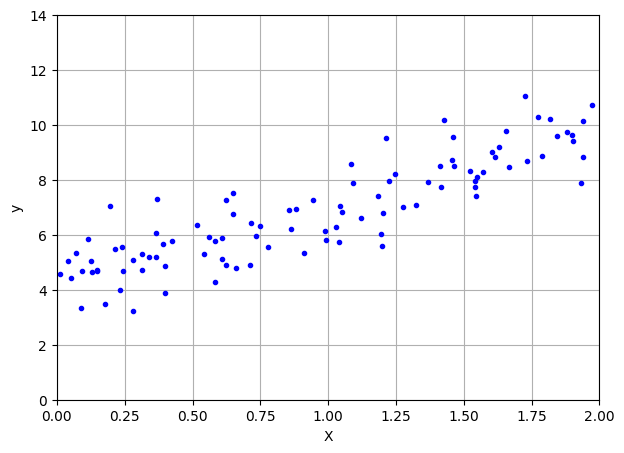

In [3]:
plt.figure(figsize=(7,5))
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 14])
plt.xlabel("X")
plt.ylabel("y")
plt.grid()
plt.show()

In [4]:
X_b = add_dummy_feature(X) # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [5]:
print(theta_best)

[[4.21509616]
 [2.77011339]]


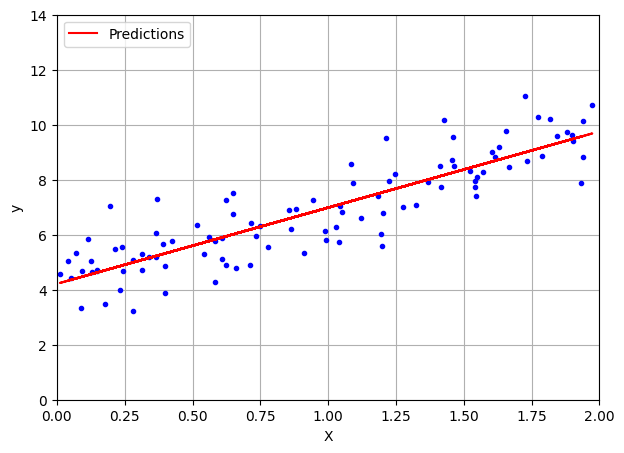

In [6]:
y_pred = X_b @ theta_best

plt.figure(figsize=(7,5))
plt.plot(X, y, 'b.')
plt.plot(X, y_pred, 'r-', label = "Predictions")
plt.axis([0, 2, 0, 14])
plt.xlabel("X")
plt.ylabel("y")
plt.grid()
plt.legend(loc="upper left")
plt.show()

In [7]:
# Scikit-Learn linear regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [9]:
X_new = np.array([[0], [2]])
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

Could also compute the pseudoinverse (Moore-Penrose inverse) directly using np.linalg.pinv().

In [10]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

### Gradient Descent

The general idea of gradient descent is to tweak parameters iteratively (searching the models *parameter space*) in order to minimize a cost function.

#### Batch Gradient Descent

*Batch gradient descent* uses the whole batch of training data at every step. In other words, it involves calculations over the full training set X, at each gradient descent step.